<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/AnaliseGrafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [18]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [19]:
#leitura dos dados
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Vale-IA/dados/infarma-2019.csv')
raw_data['date_id'] = pd.to_datetime(raw_data['date_id'],format='%Y%m%d')
raw_data['time_id'] = pd.to_datetime(raw_data['time_id'],format='%H:%M').dt.time

FileNotFoundError: ignored

In [ ]:
#trabalhando apenas com dados de 2019
inicio = '2019-06-01'
fim = '2020-01-01'
raw_data = raw_data[(raw_data['date_id']>=inicio) & (raw_data['date_id']<fim)]

In [ ]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (20,5)

In [ ]:
#agrupando vendas por minuto do dia
dados = raw_data.groupby(['date_id','time_id'],as_index=True)['quantidade'].sum().unstack(fill_value=0).stack().reset_index().rename(columns={0:'quantidade'})
dados.head()

,date_id,time_id,quantidade
0,2019-06-01,00:01:00,0
1,2019-06-01,00:02:00,0
2,2019-06-01,00:03:00,0
3,2019-06-01,00:04:00,0
4,2019-06-01,00:05:00,0


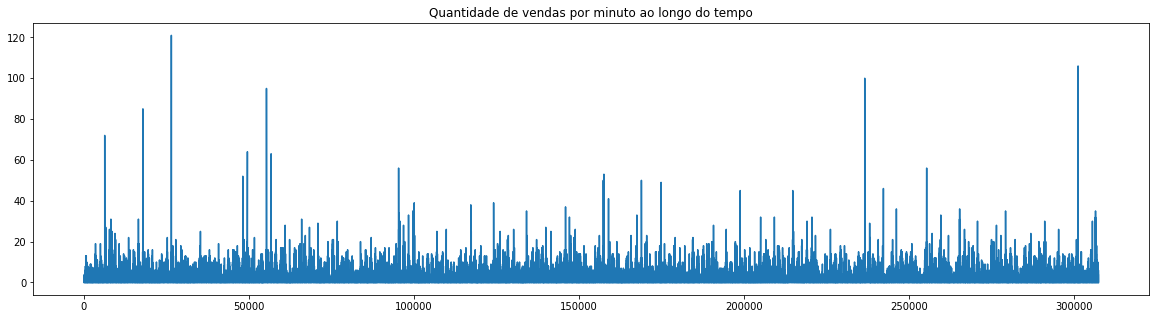

In [ ]:
plt.plot(dados.quantidade)
plt.title('Quantidade de vendas por minuto ao longo do tempo')
plt.show()

In [ ]:
#adicionando coluna com a hora do dia em cada instancia
hour = []
for i in range(dados.shape[0]):
  hour.append(dados.time_id[i].hour)
dados['hora_dia'] = hour

In [ ]:
#agrupando dados por hora do dia
hora = dados.groupby(['hora_dia'],as_index=False)['quantidade'].agg(['mean','count','std'])

In [ ]:
hora.head()

,mean,count,std
hora_dia,,,
0,0.248614,12626,0.833297
1,0.105763,12840,0.572113
2,0.059424,12840,0.380994
3,0.043069,12840,0.338507
4,0.041511,12840,0.339161


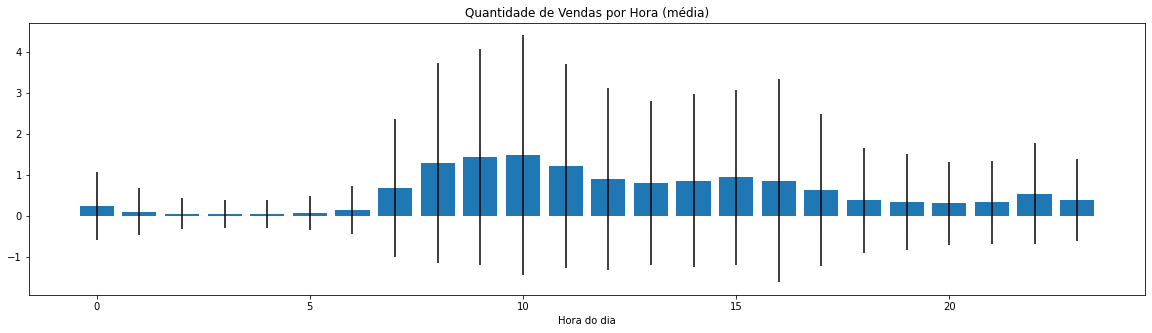

In [ ]:
plt.bar(hora.index,hora['mean'],yerr=hora['std'])
plt.title('Quantidade de Vendas por Hora (média)')
plt.xlabel('Hora do dia')
plt.show()